# Numbat example #

Plots of the concentration flux over the top boundary

Chris Green, 2016 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Initially, the mass flux is purely diffusive, in which case the flux over the top boundary scales as $\sqrt(1/(\pi t))$ where $t$ is time.

In [2]:
tdata = np.linspace(1,5000, 500)
cdata = np.sqrt(1/(np.pi * tdata))

## 2D cases ##

Read in the data from the 2D examples and plot it. For the 2D cases, the width of the top boundary is 1000 m.

There are two 2D examples: an isotropic model (2Dddc.i), and an anisotropic model (2Dddc2.i) with $\gamma = 0.5$. The isotropic simulation runs for 2500 seconds, the anisotropic simulation runs for 5000 seconds. 

In [261]:
moosedata2D = pd.read_csv('./results/2Dddc_isotropic.csv', header = 0, skiprows=[1])
moosedata2D2 = pd.read_csv('./results/2Dddc_anisotropic.csv', header = 0, skiprows=[1])
width = 1000

IOError: File ./results/2Dddc_isotropic.csv does not exist

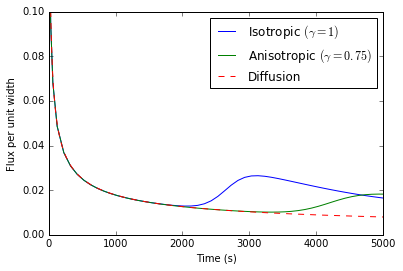

In [18]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, label = 'Isotropic $(\gamma=1)$',markevery=1)
plt.plot(moosedata2D2.time, -moosedata2D2.boundaryfluxint / width, label = 'Anisotropic $(\gamma=0.75)$',markevery=1)
plt.plot(tdata, cdata, '--',label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux per unit width')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);
plt.savefig("2Dfluxcomp.png")

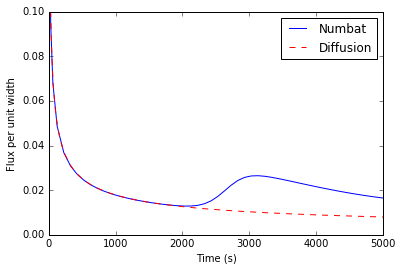

In [17]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, label = 'Numbat')
plt.plot(tdata, cdata, 'r--', label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux per unit width')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);
plt.xlim([0,5000]);
plt.savefig("2Dflux.png")

## Psuedo 2D model using 3D mesh ##

In this example, a pseudo representation of the 2D model above is created with a 3D mesh with only a single element in the *y* direction.

Read in the data from the 3D case and plot it against the above 2D results. For the 3D case, the cross-sectional area of the top boundary is 1000 * 1 m$^2$.

In [260]:
moosedata2Dp = pd.read_csv('./results/3Dddcp.csv', header = 0, skiprows=[1])
area = 1000

IOError: File ./results/3Dddcp.csv does not exist

In [259]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, label = '2D $(\gamma=1)$')
plt.plot(moosedata2Dp.time, -moosedata2Dp.boundaryfluxint / area, label = 'pseudo 2D $(\gamma=1)$')
plt.plot(tdata, cdata, 'k--', label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);
plt.xlim([0,2500]);

NameError: name 'width' is not defined

The flux over the top boundary is slightly delayed in the 3D case, but shows that the 3D model approximates the 2D model well.

## 3D case ##

Read in the data from the 3D example and plot it. For the 3D case, the cross-sectional area of the top boundary is 500 * 500 m$^2$.

In [262]:
moosedata3D = pd.read_csv('./results/3Dddc.csv', header = 0, skiprows=[1])
area = 500 * 500

IOError: File ./results/3Dddc.csv does not exist

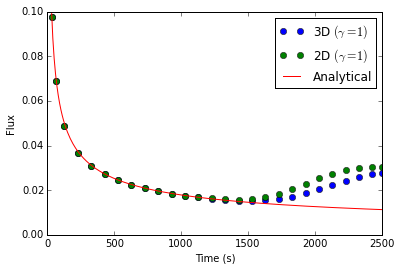

In [15]:
plt.plot(moosedata3D.time, -moosedata3D.boundaryfluxint / area, 'o', label = '3D $(\gamma=1)$', markevery=1)
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, 'o', label = '2D $(\gamma=1)$',markevery=1)
plt.plot(tdata, cdata, label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);
plt.xlim([0,2500]);

## Dimensional example

In [196]:
# Parameters for the dimensional case
rho = 1005.5
porosity = 0.3
diffusion = 2e-9
C0 = 0.049306
mu = 6e-4
deltarho = 10.5
g = 9.81
k = 1e-11

# Analytical diffusion profile per unit width for the dimensional formulation
def f(t):
    return C0 * porosity * rho * np.sqrt(diffusion / (np.pi * t))

# Analytical total mass per unit width for the dimensional formulation
def m(t):
    return 2 * C0 * porosity * rho * np.sqrt(diffusion * t / np.pi)

# Nondimensional flux
def F(x):
    return  x * mu / (1000 * C0 * deltarho * k * g)

In [215]:
moosedata2D = pd.read_csv('./results/dimensional/2Dddc.csv', header = 0, skiprows=[1])

### 2D cases

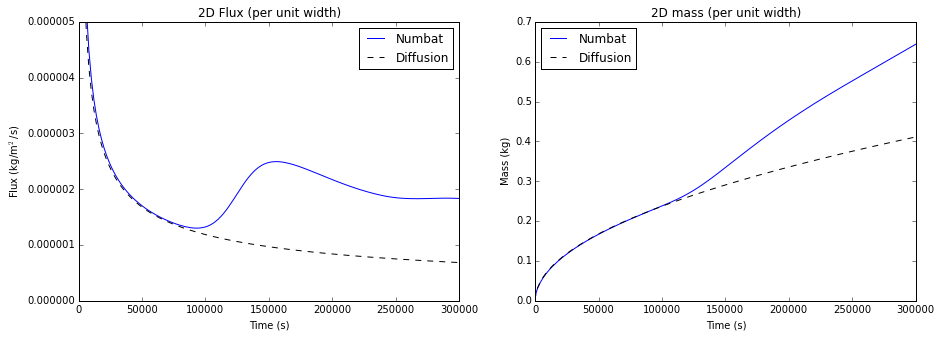

In [258]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Flux
axes[0].plot(moosedata2D.time, -moosedata2D.boundaryfluxint, label = 'Numbat')
axes[0].plot(moosedata2D.time, f(moosedata2D.time), 'k--', label = 'Diffusion')
axes[0].legend()
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Flux (kg/m$^2$/s)')
axes[0].set_ylim([0, 5e-6])
axes[0].set_title('2D Flux (per unit width)');

# Total mass
axes[1].plot(moosedata2D.time, moosedata2D.mass, label = 'Numbat')
axes[1].plot(moosedata2D.time, m(moosedata2D.time), 'k--', label = 'Diffusion')
axes[1].legend(loc='best')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Mass (kg)')
axes[1].set_title('2D mass (per unit width)')

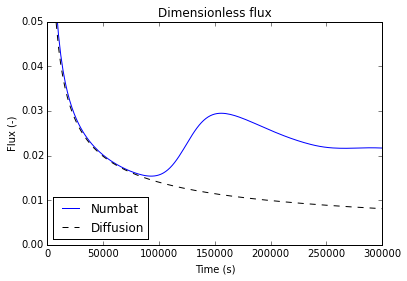

In [256]:
plt.plot(moosedata2D.time, - F(moosedata2D.boundaryfluxint), label = 'Numbat')
plt.plot(moosedata2D.time, F(f(moosedata2D.time)), 'k--', label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux (-)')
plt.legend(loc = 'best')
plt.ylim([0,0.05]);
plt.title('Dimensionless flux')

### 3D case

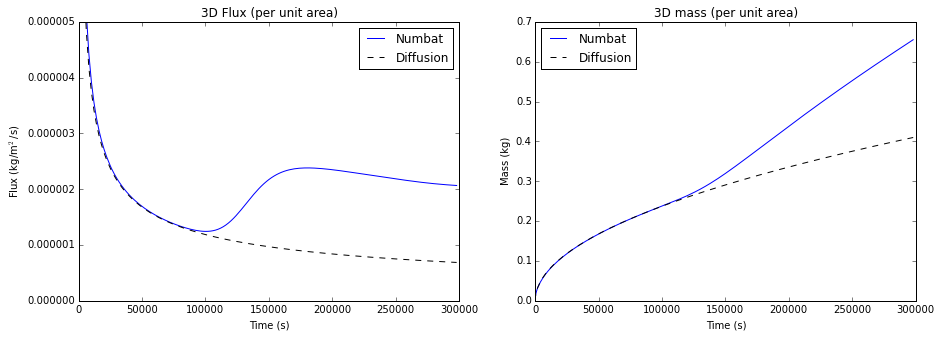

In [254]:
moosedata3D = pd.read_csv('./results/dimensional/3Dddc.csv', header = 0, skiprows=[1])
area = 0.5 * 0.5

fig, axes = plt.subplots(1,2, figsize=(15,5))

# Flux
axes[0].plot(moosedata3D.time, -moosedata3D.boundaryfluxint/area, label = 'Numbat')
axes[0].plot(moosedata3D.time, f(moosedata3D.time), 'k--', label = 'Diffusion')
axes[0].legend()
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Flux (kg/m$^2$/s)')
axes[0].set_ylim([0, 5e-6])
axes[0].set_title('3D Flux (per unit area)');

# Total mass
axes[1].plot(moosedata3D.time, moosedata3D.mass/area, label = 'Numbat')
axes[1].plot(moosedata3D.time, m(moosedata3D.time), 'k--', label = 'Diffusion')
axes[1].legend(loc='best')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Mass (kg)')
axes[1].set_title('3D mass (per unit area)')

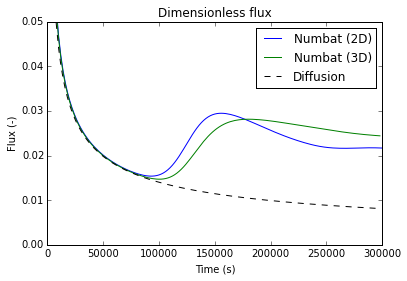

In [255]:
plt.plot(moosedata2D.time, - F(moosedata2D.boundaryfluxint), label = 'Numbat (2D)')
plt.plot(moosedata3D.time, - F(moosedata3D.boundaryfluxint)/area, label = 'Numbat (3D)')
plt.plot(moosedata3D.time, F(f(moosedata3D.time)), 'k--', label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux (-)')
plt.legend(loc = 'best')
plt.ylim([0,0.05]);
plt.title('Dimensionless flux')